### Catalyst.jl


In [3]:
using Pkg

In [4]:
Pkg.add("Catalyst")

   Resolving package versions...


  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


In [5]:
using Catalyst

# Michaelis-Menten kinetics

[Michaelis Menten](https://en.wikipedia.org/wiki/Michaelis–Menten_kinetics#:~:text=In%20biochemistry%2C%20Michaelis–Menten%20kinetics,one%20substrate%20and%20one%20product.)

In [35]:
rs = @reaction_network begin
  c1, S + E --> SE
  c2, SE --> S + E
  c3, SE --> P + E
end

Model ##ReactionSystem#304
States (4):
  S(t)
  E(t)
  SE(t)
  P(t)
Parameters (3):
  c1
  c2
  c3

In [41]:
simple_reaction = @reaction_network begin
    k₁, X --> Y
end

Model ##ReactionSystem#709
States (2):
  X(t)
  Y(t)
Parameters (1):
  k₁

In [44]:
reactions(simple_reaction)

1-element Vector{Reaction}:
 k₁, X --> Y

In [46]:
p = (:c1 => 0.00166, :c2 => 0.0001, :c3 => 0.1) #rate constants
tspan = (0., 100.) #time span
u0 = [:S => 301., :E => 100., :SE => 0., :P => 0.] #initial conditions (concentrations)

4-element Vector{Pair{Symbol, Float64}}:
  :S => 301.0
  :E => 100.0
 :SE => 0.0
  :P => 0.0

In [19]:
Pkg.add("DiffEqJump")

   Resolving package versions...


   Installed ArrayInterfaceCore ─ v0.1.29


   Installed DiffEqJump ───────── v8.6.3


    Updating `~/.julia/environments/v1.9/Project.toml`
  [c894b116] + DiffEqJump v8.6.3
    Updating `~/.julia/environments/v1.9/Manifest.toml`


  [30b0a656] + ArrayInterfaceCore v0.1.29
  [c894b116] + DiffEqJump v8.6.3


Precompiling 

project...


  ✓ ArrayInterfaceCore


  ✓ DiffEqJump
  2 dependencies successfully precompiled in 3 seconds. 412 already precompiled.
  1 dependency had warnings during precompilation:
┌ DiffEqJump [c894b116-72e5-5b58-be3c-e6d8d4ac2b12]
│  WARNING: method definition for #MassActionJump#8 at /Users/leticiamadureira/.julia/packages/DiffEqJump/o61Dj/src/jumps.jl:251 declares type variable U but does not use it.
│  WARNING: method definition for #MassActionJump#8 at /Users/leticiamadureira/.julia/packages/DiffEqJump/o61Dj/src/jumps.jl:251 declares type variable S but does not use it.
│  WARNING: method definition for #MassActionJump#9 at /Users/leticiamadureira/.julia/packages/DiffEqJump/o61Dj/src/jumps.jl:256 declares type variable U but does not use it.
│  WARNING: method definition for #MassActionJump#9 at /Users/leticiamadureira/.julia/packages/DiffEqJump/o61Dj/src/jumps.jl:256 declares type variable S but does not use it.
│  WARNING: method definition for #RDirectJumpAggregation#62 at /Users/leticiamadureira/.julia/packag

In [20]:
using DiffEqJump

In [49]:
oprob = ODEProblem(rs, u0, tspan, p)
osol  = solve(oprob, Tsit5())

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 35-element Vector{Float64}:
   0.0
   2.8303329106216295e-5
   0.00031133662016837927
   0.003141669530790009
   0.0314449986370063
   0.10377641178122772
   0.2325893152139013
   0.425836633290284
   0.6953503423594836
   1.0658163661976932
   ⋮
  54.390124231179875
  60.808325756173055
  67.03316309537716
  73.09071665516201
  79.01698730714132
  84.84553252580767
  90.60505212976447
  96.32477303759455
 100.0
u: 35-element Vector{Vector{Float64}}:
 [301.0, 100.0, 0.0, 0.0]
 [300.99858580918186, 99.99858581118316, 0.0014141888168428558, 2.0013198043122127e-9]
 [300.9844453664851, 99.9844456086273, 0.015554391372712462, 2.4214220274890293e-7]
 [300.8431873362214, 99.84321197490159, 0.1567880250984209, 2.4638680226610963e-5]
 [299.44509641414913, 98.44754702402507, 1.552452975974943, 0.0024506098759435498]
 [295.9878946910253, 95.01410485483542, 4.9858951451645845, 0.026210163810148485]
 [290.21390246417053, 

In [28]:
Pkg.add("DifferentialEquations")

   Resolving package versions...


   Installed Sundials_jll ─────────── v5.2.1+0
   Installed BoundaryValueDiffEq ──── v2.11.0


   Installed SteadyStateDiffEq ────── v1.15.0
   Installed TriangularSolve ──────── v0.1.19
   Installed NonlinearSolve ───────── v1.8.0
   Installed SLEEFPirates ─────────── v0.6.39
   Installed BandedMatrices ───────── v0.17.28
   Installed SimpleUnPack ─────────── v1.1.0
   Installed DifferentialEquations ── v7.8.0
   Installed SciMLNLSolve ─────────── v0.1.8
   Installed LinearSolve ──────────── v2.2.1


   Installed LevyArea ─────────────── v1.0.0
   Installed ArrayLayouts ─────────── v1.0.6


   Installed Sundials ─────────────── v4.19.0
   Installed DiffEqNoiseProcess ───── v5.17.2
   Installed DelayDiffEq ──────────── v5.42.0
   Installed StochasticDiffEq ─────── v6.61.1
   Installed LoopVectorization ────── v0.12.162


   Installed FastLapackInterface ──── v1.2.9
   Installed KLU ──────────────────── v0.4.0
   Installed OrdinaryDiffEq ───────── v6.53.2
   Installed ExponentialUtilities ─── v1.24.0


   Installed ResettableStacks ─────── v1.1.1
   Installed HostCPUFeatures ──────── v0.1.15
   Installed VectorizationBase ────── v0.21.64
   Installed RecursiveFactorization ─ v0.2.18
   Installed Krylov ───────────────── v0.9.1
   Installed SparseDiffTools ──────── v2.4.1
   Installed Sparspak ─────────────── v0.3.9


    Updating `~/.julia/environments/v1.9/Project.toml`
  [0c46a032] + DifferentialEquations v7.8.0
    Updating `~/.julia/environments/v1.9/Manifest.toml`


⌃ [4c555306] + ArrayLayouts v1.0.6
  [aae01518] + BandedMatrices v0.17.28
⌅ [764a87c0] + BoundaryValueDiffEq v2.11.0
  [bcd4f6db] + DelayDiffEq v5.42.0
  [77a26b50] + DiffEqNoiseProcess v5.17.2
  [0c46a032] + DifferentialEquations v7.8.0
  [d4d017d3] + ExponentialUtilities v1.24.0
  [9aa1b823] + FastClosures v0.3.2
  [29a986be] + FastLapackInterface v1.2.9
  [c145ed77] + GenericSchur v0.5.3
  [3e5b6fbb] + HostCPUFeatures v0.1.15
  [ef3ab10e] + KLU v0.4.0
  [ba0b0d4f] + Krylov v0.9.1
  [2d8b4e74] + LevyArea v1.0.0
  [7ed4a6bd] + LinearSolve v2.2.1
  [bdcacae8] + LoopVectorization v0.12.162
  [8913a72c] + NonlinearSolve v1.8.0
  [429524aa] + Optim v1.7.6
  [1dea7af3] + OrdinaryDiffEq v6.53.2
  [85a6dd25] + PositiveFactorizations v0.2.4
  [f2c3362d] + RecursiveFactorization v0.2.18
  [ae5879a3] + ResettableStacks v1.1.1
  [476501e8] + SLEEFPirates v0.6.39
  [e9a6253c] + SciMLNLSolve v0.1.8
  [ce78b400] + SimpleUnPack v1.1.0
  [47a9eef4] + SparseDiffTools v2.4.1
  [e56a9233] + Sparspak v0.

Precompiling 

project...


  ✓ SimpleUnPack
  ✓ FastClosures


  ✓ KLU


  ✓ GenericSchur


  ✓ FastLapackInterface
  ✓ ResettableStacks


  ✓ HostCPUFeatures


  ✓ LevyArea
  ✓ Sparspak


  ✓ Sundials_jll


  ✓ VertexSafeGraphs


  ✓ SciMLNLSolve


  ✓ Krylov


  ✓ SteadyStateDiffEq


  ✓ ArrayLayouts


  ✓ SparseDiffTools


  ✓ DiffEqNoiseProcess


  ✓ SparseDiffTools → SparseDiffToolsZygoteExt


  ✓ VectorizationBase


  ✓ SLEEFPirates


  ✓ Sundials


  ✓ ExponentialUtilities


  ✓ BandedMatrices


  ✓ ArrayInterface → ArrayInterfaceBandedMatricesExt


  ✓ FiniteDiff → FiniteDiffBandedMatricesExt


  ✓ BoundaryValueDiffEq


  ✓ LoopVectorization


  ✓ LoopVectorization → SpecialFunctionsExt


  ✓ TriangularSolve


  ✓ LoopVectorization → ForwardDiffExt


  ✓ RecursiveFactorization


  ✓ LinearSolve


  ✓ LinearSolve → LinearSolveCUDAExt


  ✓ NonlinearSolve


  ✓ OrdinaryDiffEq


  ✓ DelayDiffEq


  ✓ StochasticDiffEq


  ✓ DifferentialEquations
  38 dependencies successfully precompiled in 181 seconds. 416 already precompiled.
  1 dependency had warnings during precompilation:
┌ BoundaryValueDiffEq [764a87c0-6b3e-53db-9096-fe964310641d]
│  ┌ Warning: Module ArrayInterfaceBandedMatricesExt with build ID fafbfcfd-0a70-8b6f-0001-c85d348ee34d is missing from the cache.
│  │ This may mean ArrayInterfaceBandedMatricesExt [26e938bc-0cd5-5679-9003-44616cbf91d3] does not support precompilation but is imported by a module that does.
│  └ @ Base loading.jl:1758
│  ┌ Error: Error during loading of extension ArrayInterfaceBandedMatricesExt of ArrayInterface, use `Base.retry_load_extensions()` to retry.
│  │   exception =
│  │    1-element ExceptionStack:
│  │    Declaring __precompile__(false) is not allowed in files that are being precompiled.
│  │    Stacktrace:
│  │      [1] _require(pkg::Base.PkgId, env::Nothing)
│  │        @ Base ./loading.jl:1762
│  │      [2] _require_prelocked(uuidkey::Base.PkgId, env::N

In [32]:
using DifferentialEquations

In [33]:
sol = solve(dprob, SSAStepper())

retcode: Success
Interpolation: left-endpoint piecewise constant
t: 20001-element Vector{Float64}:
     0.0
     1.0
     2.0
     3.0
     4.0
     5.0
     6.0
     7.0
     8.0
     9.0
     ⋮
 19992.0
 19993.0
 19994.0
 19995.0
 19996.0
 19997.0
 19998.0
 19999.0
 20000.0
u: 20001-element Vector{Vector{Float64}}:
 [15.0, 300.0, 0.0, 0.0]
 [15.0, 300.0, 0.0, 0.0]
 [15.0, 300.0, 0.0, 0.0]
 [15.0, 300.0, 0.0, 0.0]
 [15.0, 300.0, 0.0, 0.0]
 [15.0, 300.0, 0.0, 0.0]
 [15.0, 300.0, 0.0, 0.0]
 [15.0, 300.0, 0.0, 0.0]
 [15.0, 300.0, 0.0, 0.0]
 [15.0, 300.0, 0.0, 0.0]
 ⋮
 [15.0, 300.0, 0.0, 0.0]
 [15.0, 300.0, 0.0, 0.0]
 [15.0, 300.0, 0.0, 0.0]
 [15.0, 300.0, 0.0, 0.0]
 [15.0, 300.0, 0.0, 0.0]
 [15.0, 300.0, 0.0, 0.0]
 [15.0, 300.0, 0.0, 0.0]
 [15.0, 300.0, 0.0, 0.0]
 [15.0, 300.0, 0.0, 0.0]

In [13]:
using Plots

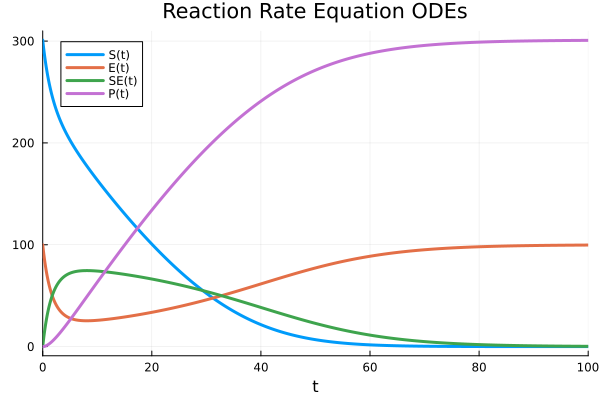

In [50]:
plot(osol; title = "Reaction Rate Equation ODEs", linewidth =3)

### Homework

- Test new rate constants 
- Test new initial conditions

- Try your own reaction network